# Data Analysis and ML Model on Heart Disease UCI Dataset
**Purpose:** In this notebook, we will be helding important steps for machine learning such as data preprocessing, data analysis, outlier detection and handling and encoding categorical data. At last, we will have created a machine learning model.

**Dataset:** Heart Disease UCI dataset is a dataset collected by Cleveland Clinic Foundation aiming to detect heart health conditions for better insights. The dataset is a popular dataset existing on UCI Machine Learning Repository and includes variety of features used in heart disease detection. It's developed by Robert Detrano and his colleagues in 1988 by aiming to develop a model that can estimate if a person has a heart disease risk or not.

**Note:** We will be using https://archive.ics.uci.edu/dataset/45/heart+disease as our resource.

## Importing the Libraries
Importing the necessary libraries we will be using through this project.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
pd.set_option('future.no_silent_downcasting', True)

### First Look at the Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heart_disease_uci.csv")

In [ ]:
display(df.head(10))

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [ ]:
display(df.tail())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [ ]:
# id is not important for us

df = df.drop("id", axis=1)

In [ ]:
df.shape

(920, 15)

For a better comprehension, checking the related website: https://archive.ics.uci.edu/dataset/45/heart+disease, we can do a business analysis (detailed inspection).

| Variable Name | Type | Description |
| -------- | ------- | ------- |
| id  | int    | patient id |
| age | int     | age |
| sex    | object    | gender |
| dataset  | object    | source |
| cp  | float | chest pain type |
| trestbps | float    | resting blood pressure |
| chol  | float    | serum cholesteral mg/dl |
| fbs | object     | 	fasting blood sugar > 120 mg/dl |
| restecg    | object    | resting electrocardiographic results (values 0,1,2) |
| exang  | object    | exercise induced angina |
| oldpeak | object     | ST depression induced by exercise relative to rest |
| slope    | object    | the slope of the peak exercise ST segment |
| ca  | float    | number of major vessels colored by fluoroscopy |
| thal | object     | maximum heart rate achieved |
| num    | int    | 0 = normal; 1 = fixed defect; 2 = reversable defect |



## Exploratory Data Analysis (EDA)
In this section, we will be helding steps such as exploring it for a better insight and for more beneficial usage.
* Inspect Data Structure: Have a look at the general structure of the dataset.
* Special Statistics: Inspect mean, standard deviation, min, max and quartile values of numerical columns.
* Missing Value Analysis: Check if there are any missing values and determine how to handle them.
### Inspecting the Data Structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


There seems to be some missing values in the dataset. Let's first check the null values.

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55
exang,55


There are much more null values than it seemed. Now, let's check some statistical values using pandas.DataFrame.describe() method.

### Checking Statistical Values of Numerical Columns

In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## Splitting the Categorical and Numerical Data


In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
print("Kategorik Sütunlar:", categorical_columns)

Kategorik Sütunlar: Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [ ]:
print("Kategorik Sütunlar:", numeric_columns)

Kategorik Sütunlar: Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')


## Missing Value Analysis
Let's find the missing value percentages.

In [ ]:
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df))* 100
print(pd.DataFrame({'Missing Values': missing_values,
                    'Percentage': missing_values_percentage}))

          Missing Values  Percentage
age                    0    0.000000
sex                    0    0.000000
dataset                0    0.000000
cp                     0    0.000000
trestbps              59    6.413043
chol                  30    3.260870
fbs                   90    9.782609
restecg                2    0.217391
thalch                55    5.978261
exang                 55    5.978261
oldpeak               62    6.739130
slope                309   33.586957
ca                   611   66.413043
thal                 486   52.826087
num                    0    0.000000


Now, we can either drop or fill up the missing values. Let's fill them up!

In [ ]:
from sklearn.impute import SimpleImputer

# Filling up the numerical values
for col in numeric_columns:
  df[col] = df[col].fillna(df[col].mean())

In [ ]:
# Filling up the categorical values
for col in categorical_columns:
  df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Checking the missing values
display(df.isnull().sum())

,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0


* _Checking the unique values for encoding process._

In [ ]:
for col in categorical_columns:
    print(f"{col} column's unique values: {df[col].unique()}\n")

sex column's unique values: ['Male' 'Female']

dataset column's unique values: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']

cp column's unique values: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']

fbs column's unique values: [True False]

restecg column's unique values: ['lv hypertrophy' 'normal' 'st-t abnormality']

exang column's unique values: [False True]

slope column's unique values: ['downsloping' 'flat' 'upsloping']

thal column's unique values: ['fixed defect' 'normal' 'reversable defect']



In [ ]:
for col in numeric_columns:
    print(f"{col} column's unique values: {df[col].nunique()}\n")

age column's unique values: 50

trestbps column's unique values: 62

chol column's unique values: 218

thalch column's unique values: 120

oldpeak column's unique values: 54

ca column's unique values: 5

num column's unique values: 5



## Encoding the Categorical Data
* _Now, for the categorical values, we will be using **label encoder** to for the ordinal columns and **one hot encoding** to the nominal columns._
We will try 2 different filling methods here. Since all the categorical columns can be called ordinal, we will try using label encoder on all at the first instance and one hot encoding on all at the second instance.

In [ ]:
df_copy = df.copy() # For one hot encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

In [ ]:
for col in categorical_columns:
  # Create dummy variables and concatenate with the original DataFrame
  dummies = pd.get_dummies(df_copy[col], prefix=col, drop_first=True) #drop_first=True to drop the redundant column
  df_copy = pd.concat([df_copy, dummies], axis=1)
  df_copy.drop(col, axis=1, inplace=True) # Remove original column

In [ ]:
# Checking for encoded data once more
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col} column's unique values: {df[col].unique()}\n")

No output, so all done!

In [ ]:
display(df.head())

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [ ]:
display(df_copy.head())

,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,dataset_Hungary,dataset_Switzerland,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0.0,0,True,False,False,...,False,True,True,False,False,False,False,False,False,False
1,67,160.0,286.0,108.0,1.5,3.0,2,True,False,False,...,False,False,False,False,False,True,True,False,True,False
2,67,120.0,229.0,129.0,2.6,2.0,1,True,False,False,...,False,False,False,False,False,True,True,False,False,True
3,37,130.0,250.0,187.0,3.5,0.0,0,True,False,False,...,True,False,False,True,False,False,False,False,True,False
4,41,130.0,204.0,172.0,1.4,0.0,0,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [ ]:
display(df.columns)

Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
display(df_copy.columns)

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num', 'sex_Male',
       'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'fbs_True',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_True',
       'slope_flat', 'slope_upsloping', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   dataset   920 non-null    int64  
 3   cp        920 non-null    int64  
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    int64  
 7   restecg   920 non-null    int64  
 8   thalch    920 non-null    float64
 9   exang     920 non-null    int64  
 10  oldpeak   920 non-null    float64
 11  slope     920 non-null    int64  
 12  ca        920 non-null    float64
 13  thal      920 non-null    int64  
 14  num       920 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 107.9 KB


None

In [ ]:
display(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   trestbps                  920 non-null    float64
 2   chol                      920 non-null    float64
 3   thalch                    920 non-null    float64
 4   oldpeak                   920 non-null    float64
 5   ca                        920 non-null    float64
 6   num                       920 non-null    int64  
 7   sex_Male                  920 non-null    bool   
 8   dataset_Hungary           920 non-null    bool   
 9   dataset_Switzerland       920 non-null    bool   
 10  dataset_VA Long Beach     920 non-null    bool   
 11  cp_atypical angina        920 non-null    bool   
 12  cp_non-anginal            920 non-null    bool   
 13  cp_typical angina         920 non-null    bool   
 14  fbs_True  

None

## Shapiro-Wilk Test
Shapiro-Wilk test is a statistical test to evaluate the conformance of the dataset to normal distribution.

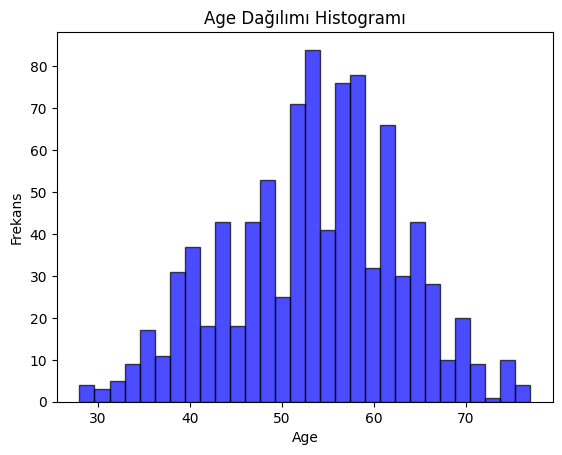

Shapiro-Wilk Testi: Test İstatistiği = 0.9911, p-değeri = 0.0000
D'Agostino's K^2 Testi: Test İstatistiği = 14.2411, p-değeri = 0.0008
Sonuç: Veri normal dağılıma uygun değil.


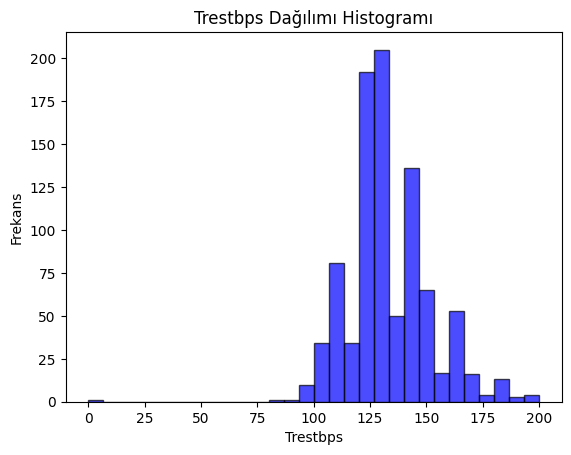

Shapiro-Wilk Testi: Test İstatistiği = 0.9543, p-değeri = 0.0000
D'Agostino's K^2 Testi: Test İstatistiği = 84.7608, p-değeri = 0.0000
Sonuç: Veri normal dağılıma uygun değil.


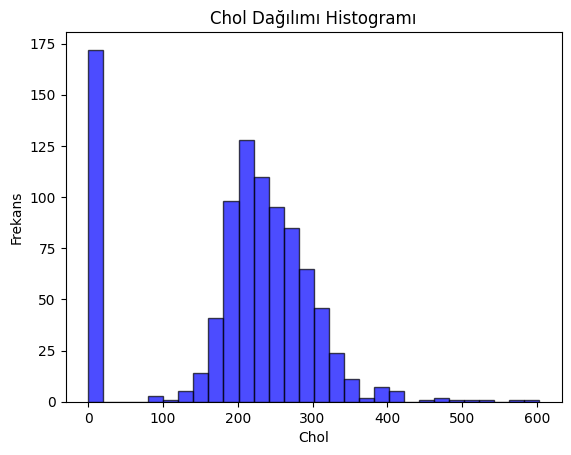

Shapiro-Wilk Testi: Test İstatistiği = 0.8663, p-değeri = 0.0000
D'Agostino's K^2 Testi: Test İstatistiği = 52.6633, p-değeri = 0.0000
Sonuç: Veri normal dağılıma uygun değil.


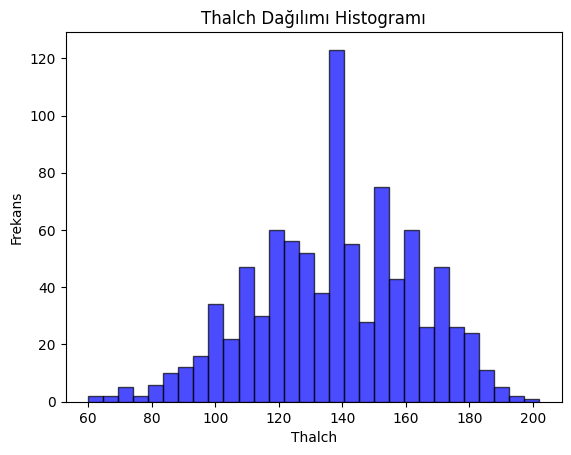

Shapiro-Wilk Testi: Test İstatistiği = 0.9926, p-değeri = 0.0001
D'Agostino's K^2 Testi: Test İstatistiği = 12.4951, p-değeri = 0.0019
Sonuç: Veri normal dağılıma uygun değil.


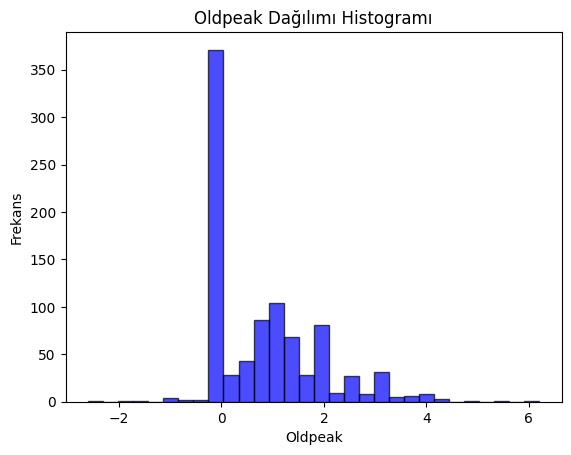

Shapiro-Wilk Testi: Test İstatistiği = 0.8603, p-değeri = 0.0000
D'Agostino's K^2 Testi: Test İstatistiği = 154.6436, p-değeri = 0.0000
Sonuç: Veri normal dağılıma uygun değil.


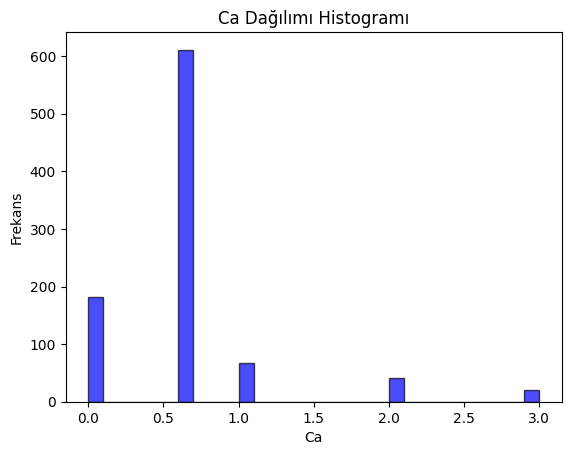

Shapiro-Wilk Testi: Test İstatistiği = 0.6602, p-değeri = 0.0000
D'Agostino's K^2 Testi: Test İstatistiği = 409.6763, p-değeri = 0.0000
Sonuç: Veri normal dağılıma uygun değil.


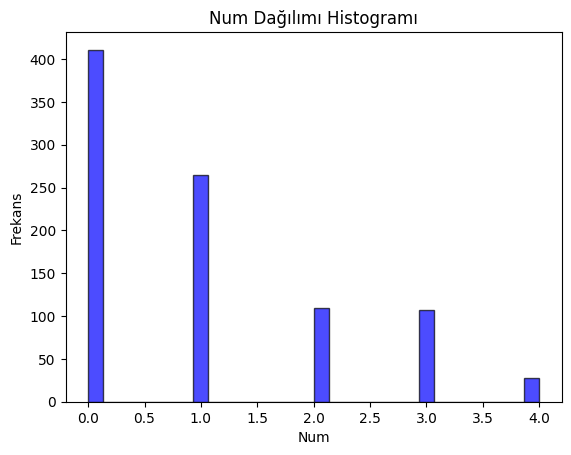

Shapiro-Wilk Testi: Test İstatistiği = 0.8002, p-değeri = 0.0000
D'Agostino's K^2 Testi: Test İstatistiği = 106.1269, p-değeri = 0.0000
Sonuç: Veri normal dağılıma uygun değil.


In [ ]:
# For Label-encoded dataset
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, probplot

for column in numeric_columns:
    plt.hist(df[column], bins=30, alpha=0.7, color="blue", edgecolor="black")
    plt.title(f"{column.capitalize()} Dağılımı Histogramı")
    plt.xlabel(column.capitalize())
    plt.ylabel("Frekans")
    plt.show()

    # Shapiro-Wilk Testi
    stat, p = shapiro(df[column])
    print(f"Shapiro-Wilk Testi: Test İstatistiği = {stat:.4f}, p-değeri = {p:.4f}")

    # Normality Test (D'Agostino's K^2 Testi)
    stat, p = normaltest(df[column])
    print(f"D'Agostino's K^2 Testi: Test İstatistiği = {stat:.4f}, p-değeri = {p:.4f}")

    # Karar
    if p > 0.05:
        print("Sonuç: Veri normal dağılıma uygun görünüyor.")
    else:
        print("Sonuç: Veri normal dağılıma uygun değil.")

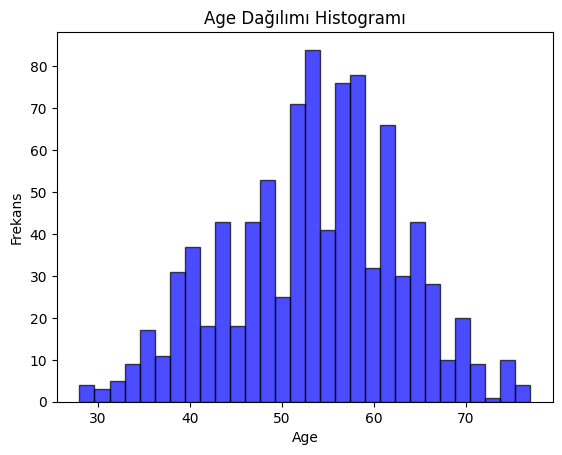

Shapiro-Wilk Testi: Test İstatistiği = 0.9911, p-değeri = 0.0000
D'Agostino's K^2 Testi: Test İstatistiği = 14.2411, p-değeri = 0.0008
Sonuç: Veri normal dağılıma uygun değil.


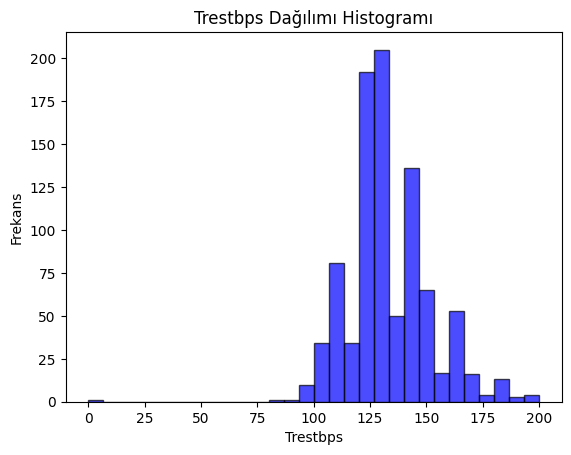

Shapiro-Wilk Testi: Test İstatistiği = 0.9543, p-değeri = 0.0000
D'Agostino's K^2 Testi: Test İstatistiği = 84.7608, p-değeri = 0.0000
Sonuç: Veri normal dağılıma uygun değil.


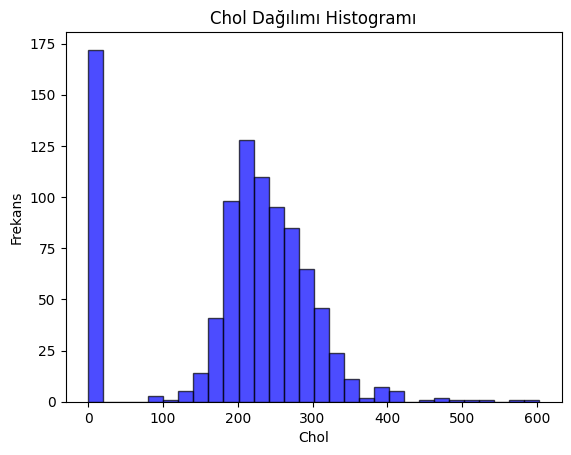

Shapiro-Wilk Testi: Test İstatistiği = 0.8663, p-değeri = 0.0000
D'Agostino's K^2 Testi: Test İstatistiği = 52.6633, p-değeri = 0.0000
Sonuç: Veri normal dağılıma uygun değil.


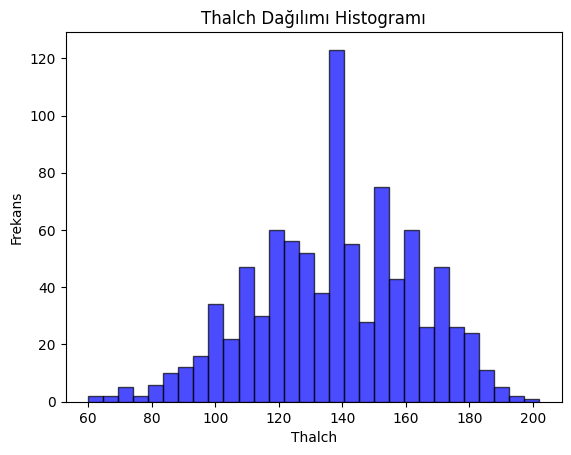

Shapiro-Wilk Testi: Test İstatistiği = 0.9926, p-değeri = 0.0001
D'Agostino's K^2 Testi: Test İstatistiği = 12.4951, p-değeri = 0.0019
Sonuç: Veri normal dağılıma uygun değil.


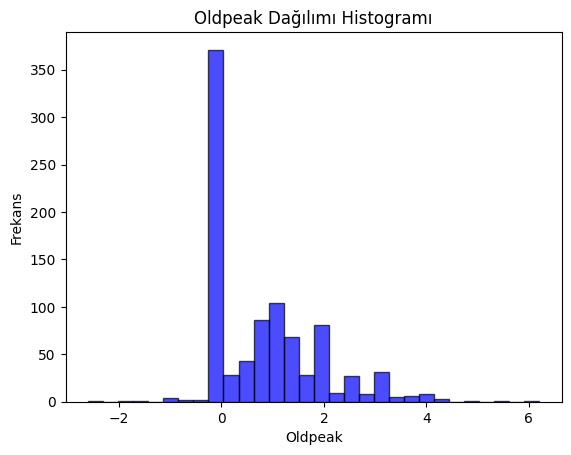

Shapiro-Wilk Testi: Test İstatistiği = 0.8603, p-değeri = 0.0000
D'Agostino's K^2 Testi: Test İstatistiği = 154.6436, p-değeri = 0.0000
Sonuç: Veri normal dağılıma uygun değil.


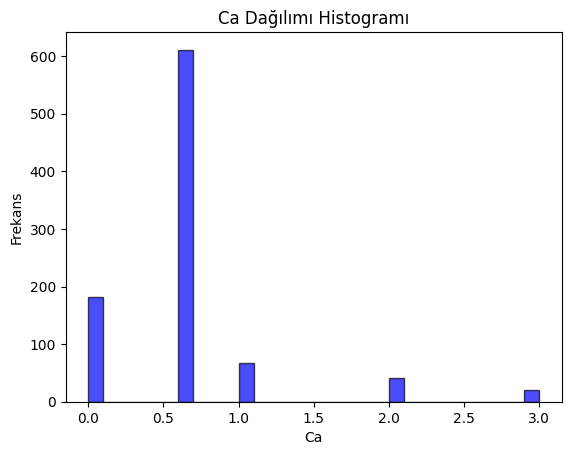

Shapiro-Wilk Testi: Test İstatistiği = 0.6602, p-değeri = 0.0000
D'Agostino's K^2 Testi: Test İstatistiği = 409.6763, p-değeri = 0.0000
Sonuç: Veri normal dağılıma uygun değil.


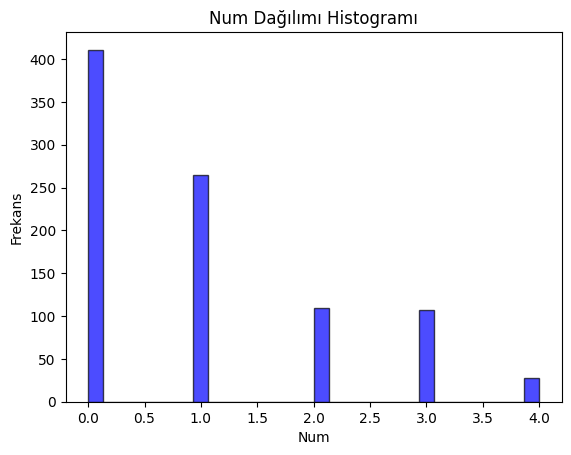

Shapiro-Wilk Testi: Test İstatistiği = 0.8002, p-değeri = 0.0000
D'Agostino's K^2 Testi: Test İstatistiği = 106.1269, p-değeri = 0.0000
Sonuç: Veri normal dağılıma uygun değil.


In [ ]:
# For one-hot-encoded dataset

for column in numeric_columns:
    plt.hist(df_copy[column], bins=30, alpha=0.7, color="blue", edgecolor="black")
    plt.title(f"{column.capitalize()} Dağılımı Histogramı")
    plt.xlabel(column.capitalize())
    plt.ylabel("Frekans")
    plt.show()

    # Shapiro-Wilk Testi
    stat, p = shapiro(df_copy[column])
    print(f"Shapiro-Wilk Testi: Test İstatistiği = {stat:.4f}, p-değeri = {p:.4f}")

    # Normality Test (D'Agostino's K^2 Testi)
    stat, p = normaltest(df_copy[column])
    print(f"D'Agostino's K^2 Testi: Test İstatistiği = {stat:.4f}, p-değeri = {p:.4f}")

    # Karar
    if p > 0.05:
        print("Sonuç: Veri normal dağılıma uygun görünüyor.")
    else:
        print("Sonuç: Veri normal dağılıma uygun değil.")

## Outlier Analysis
In this section we will be holding:

* Visualization with Box Plots: Drawing a boxplot for each numerical column.
* Outlier Detection: Detect outliers with IQR method.
* Outlier Handling (Standardizing Outliers): Handle outliers by changing them with lower and upper bounds.


--- age Column ---


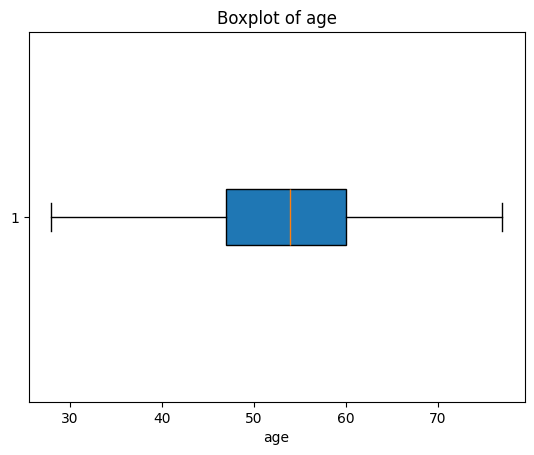

IQR: 13.0, Lower Bound: 27.5, Upper Bound: 79.5
Outlier amount: 0
Outlier amount with z-score: 0


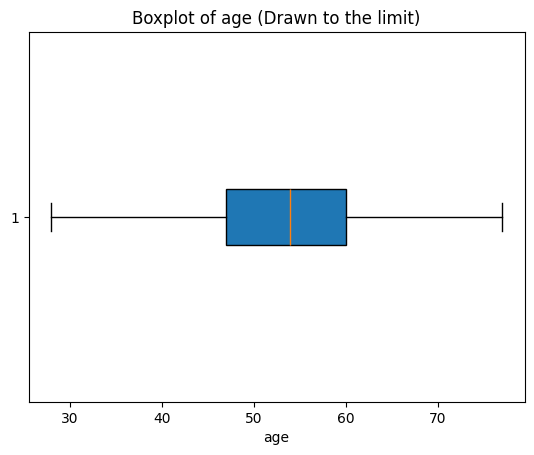


--- trestbps Column ---


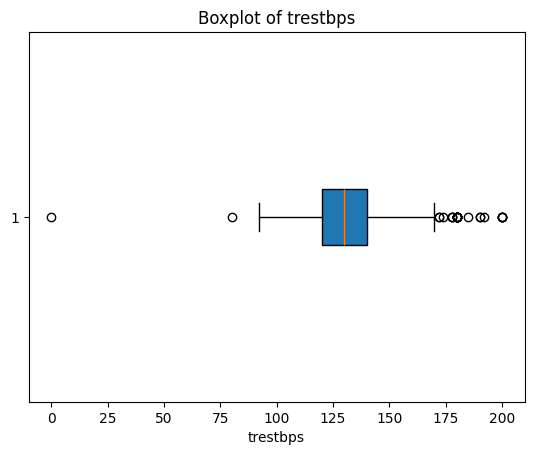

IQR: 20.0, Lower Bound: 90.0, Upper Bound: 170.0
Outlier amount: 28
Outlier amount with z-score: 8


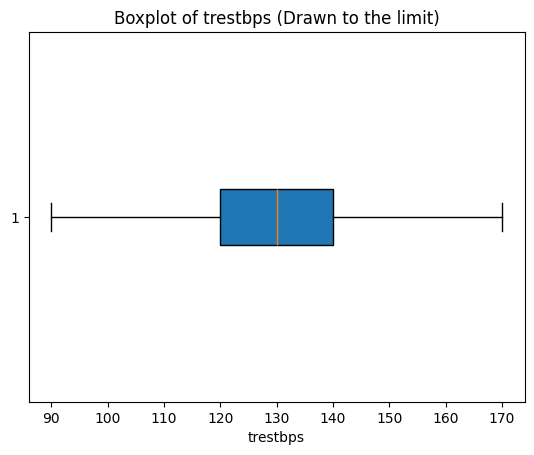


--- chol Column ---


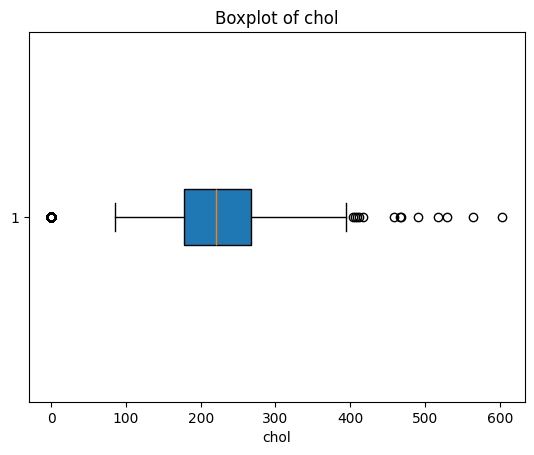

IQR: 89.25, Lower Bound: 43.875, Upper Bound: 400.875
Outlier amount: 185
Outlier amount with z-score: 3


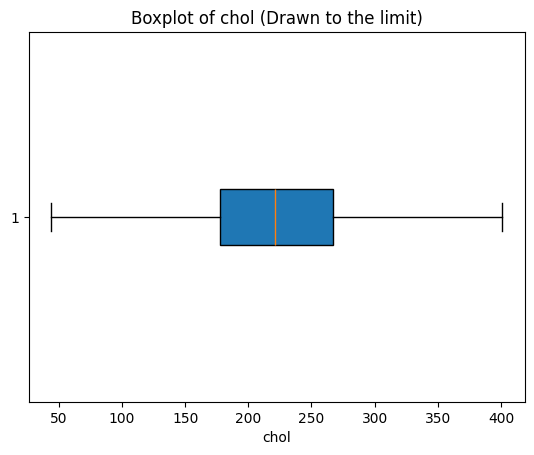


--- thalch Column ---


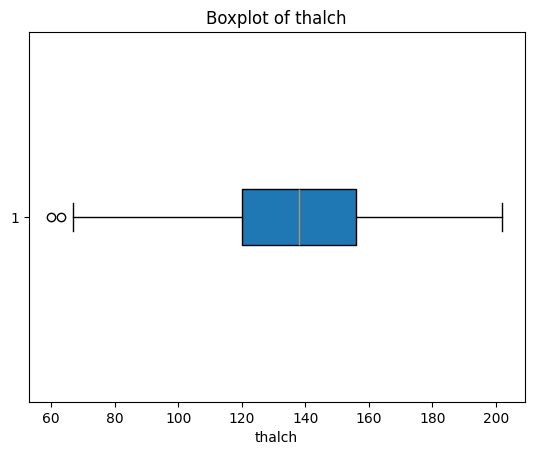

IQR: 36.0, Lower Bound: 66.0, Upper Bound: 210.0
Outlier amount: 2
Outlier amount with z-score: 1


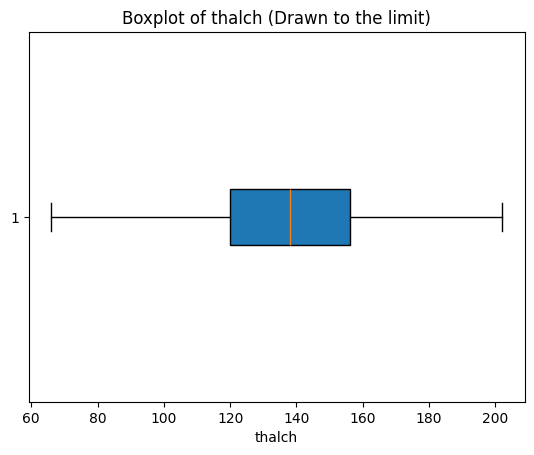


--- oldpeak Column ---


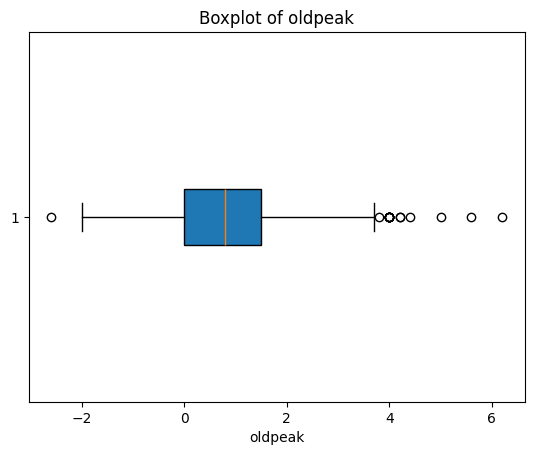

IQR: 1.5, Lower Bound: -2.25, Upper Bound: 3.75
Outlier amount: 16
Outlier amount with z-score: 7


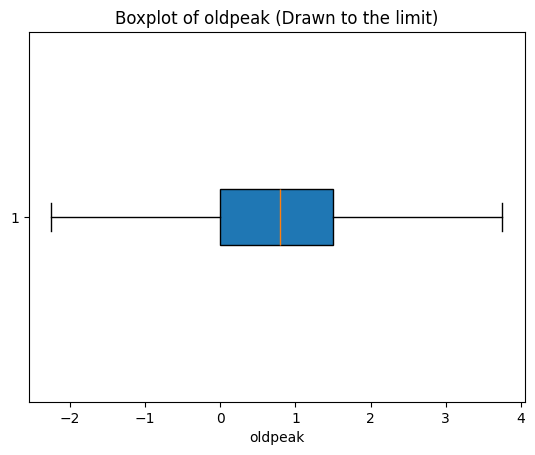


--- ca Column ---


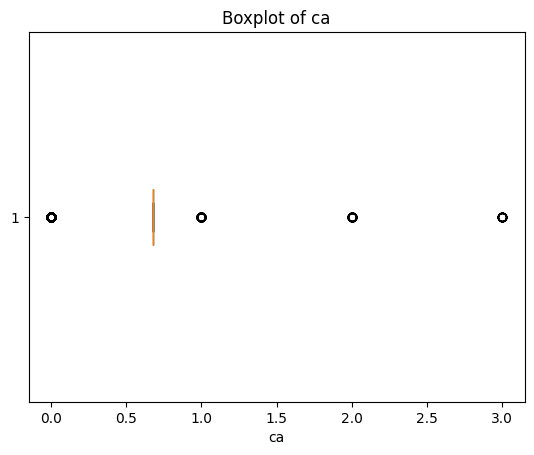

IQR: 0.0, Lower Bound: 0.6763754045307443, Upper Bound: 0.6763754045307443
Outlier amount: 309
Outlier amount with z-score: 20


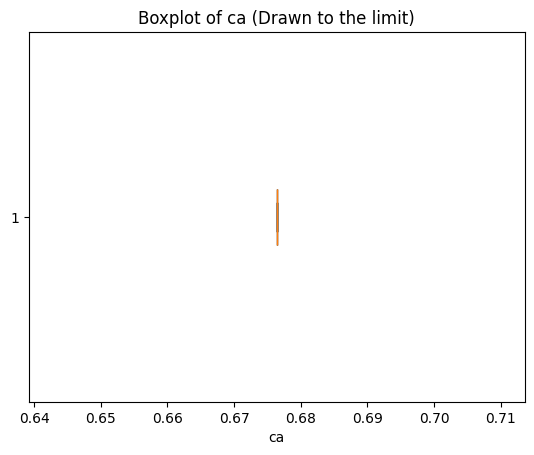


--- num Column ---


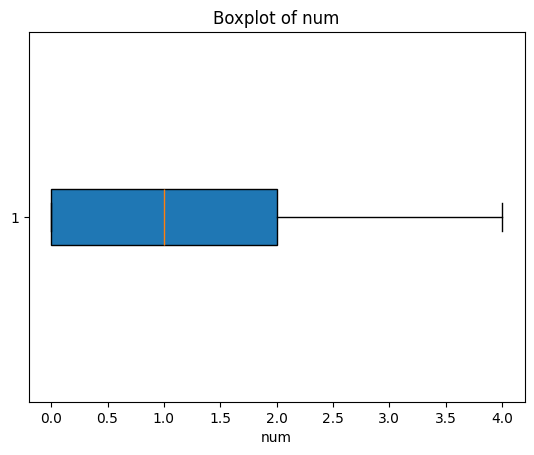

IQR: 2.0, Lower Bound: -3.0, Upper Bound: 5.0
Outlier amount: 0
Outlier amount with z-score: 0


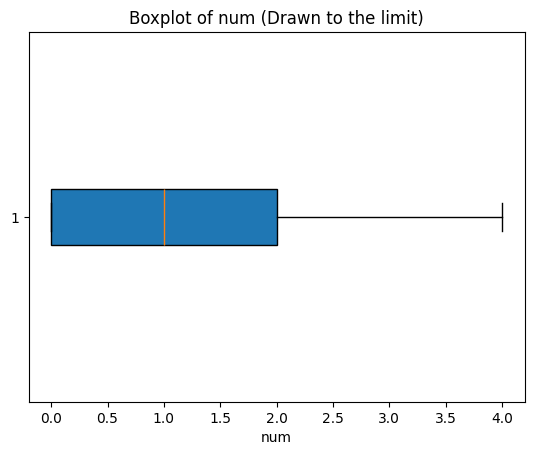

In [ ]:
# For label-encoded dataset

for col in numeric_columns:
    print(f"\n--- {col} Column ---")

    # Visualize outliers with boxplot
    plt.boxplot(df[col], vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

    # Outlier analysis with IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outlier amount: {len(outliers)}")

    # Outlier analysis with Z-score
    z_scores = zscore(df[col])
    outliers_z = df[np.abs(z_scores) > 3]
    print(f"Outlier amount with z-score: {len(outliers_z)}")

    # Draw the outliers to the limit
    df[col] = df[col].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

    # Visualize the limit drawn data again
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col} (Drawn to the limit)")
    plt.xlabel(col)
    plt.show()

In [ ]:
# For one-hot-encoded dataset - there won't be visualizations

for col in numeric_columns:
    print(f"\n--- {col} Column ---")

    # Outlier analysis with IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outlier amount: {len(outliers)}")

    # Outlier analysis with Z-score
    z_scores = zscore(df[col])
    outliers_z = df[np.abs(z_scores) > 3]
    print(f"Outlier amount with z-score: {len(outliers_z)}")

    # Draw the outliers to the limit
    df[col] = df[col].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

print("\nOutlier analysis and handling is done.")


--- age Column ---
IQR: 13.0, Lower Bound: 27.5, Upper Bound: 79.5
Outlier amount: 0
Outlier amount with z-score: 0

--- trestbps Column ---
IQR: 20.0, Lower Bound: 90.0, Upper Bound: 170.0
Outlier amount: 0
Outlier amount with z-score: 0

--- chol Column ---
IQR: 89.25, Lower Bound: 43.875, Upper Bound: 400.875
Outlier amount: 0
Outlier amount with z-score: 0

--- thalch Column ---
IQR: 36.0, Lower Bound: 66.0, Upper Bound: 210.0
Outlier amount: 0
Outlier amount with z-score: 0

--- oldpeak Column ---
IQR: 1.5, Lower Bound: -2.25, Upper Bound: 3.75
Outlier amount: 0
Outlier amount with z-score: 1

--- ca Column ---
IQR: 0.0, Lower Bound: 0.6763754045307443, Upper Bound: 0.6763754045307443
Outlier amount: 0
Outlier amount with z-score: 0

--- num Column ---
IQR: 2.0, Lower Bound: -3.0, Upper Bound: 5.0
Outlier amount: 0
Outlier amount with z-score: 0

Outlier analysis and handling is done.


## Standardization
We converted all of our features into numerical data, yet we will be scaling the originally numerical data, since the encoded features are already in a scale.

In [ ]:
numeric_columns = numeric_columns.drop("num")
print(numeric_columns)

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
scaler = MinMaxScaler()
scaler2 = MinMaxScaler()
df_scaled = df.copy()
df_copy_scaled = df_copy.copy()

In [ ]:
# Label-encoded scaled matrix
print("Label-encoded scaled matrix")
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("\nMin-Max Ölçeklenmiş Veriler:")
print(df[numeric_columns].head())


Min-Max Ölçeklenmiş Veriler:
        age  trestbps      chol    thalch   oldpeak   ca
0  0.714286    0.6875  0.529762  0.617647  0.758333  0.0
1  0.795918    0.8750  0.678221  0.308824  0.625000  0.0
2  0.795918    0.3750  0.518557  0.463235  0.808333  0.0
3  0.183673    0.5000  0.577381  0.889706  0.958333  0.0
4  0.265306    0.5000  0.448529  0.779412  0.608333  0.0


In [ ]:
# One-hot-encoded scaled matrix
print("One-hot-encoded scaled matrix")
df_copy[numeric_columns] = scaler.fit_transform(df_copy[numeric_columns])

print("\nMin-Max Ölçeklenmiş Veriler:")
print(df_copy[numeric_columns].head())


Min-Max Ölçeklenmiş Veriler:
        age  trestbps      chol    thalch   oldpeak        ca
0  0.714286     0.725  0.386401  0.633803  0.556818  0.000000
1  0.795918     0.800  0.474295  0.338028  0.465909  1.000000
2  0.795918     0.600  0.379768  0.485915  0.590909  0.666667
3  0.183673     0.650  0.414594  0.894366  0.693182  0.000000
4  0.265306     0.650  0.338308  0.788732  0.454545  0.000000


## Feature Importance Score
Modelin önem sıralamasını çıkararak hangi özelliklerin hedef değişken üzerinde en fazla etkiye sahip olduğunu analiz edin:

In [ ]:
visualization = {1: df,
                 2: df_copy,
                 3: df_scaled,
                 4: df_copy_scaled}

dataset_names = ["Label-encoded", "One-hot-encoded", "Label-encoded scaled", "One-hot-encoded scaled"]

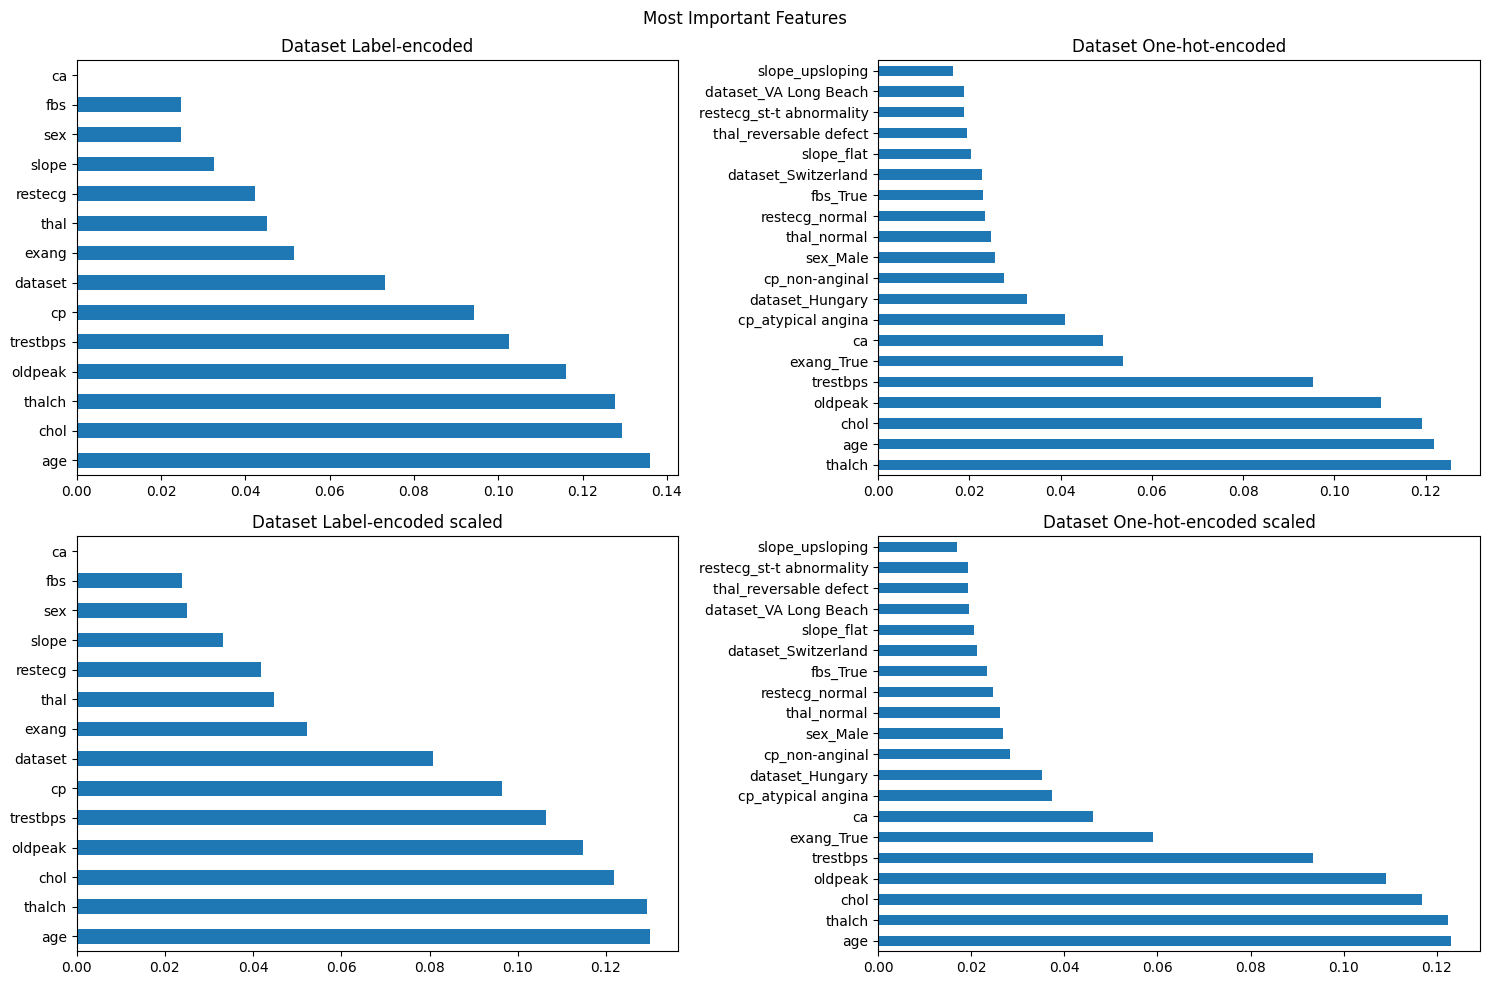

In [ ]:
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(15, 10))
plt.suptitle("Most Important Features")

for _ in range(4):
    n = _ + 1
    X = visualization[n].drop('num', axis=1)
    y = visualization[n]['num']

    model = RandomForestClassifier()
    model.fit(X, y)

    plt.subplot(2, 2, n)
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances.nlargest(20).plot(kind='barh')
    plt.title(f"Dataset {dataset_names[n-1]}")

plt.tight_layout()
plt.show()

Afer visual analysis, it's seen that One-hot encoded and scaled dataset is more specific and gives more clear ideas.

## Splitting Train, Validation and Test Datasets


In [ ]:
# Splitting Train and Test Sets
X = df.drop('num', axis=1)
y = df['num']
X_train, X_holdout_set, y_train, y_holdout_set = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
display({"X_train": X_train.shape,
         "y_train": y_train.shape,
         "X_holdout_test": X_holdout_set.shape,
         "y_holdout_test": y_holdout_set.shape})

{'X_train': (552, 14),
 'y_train': (552,),
 'X_holdout_test': (368, 14),
 'y_holdout_test': (368,)}

In [ ]:
# Splitting Validation and Test Sets
X_val_train, X_val_test, y_hold_train, y_hold_test = train_test_split(X_holdout_set, y_holdout_set, test_size=0.5, random_state=42)

In [ ]:
display({"X_val_train": X_val_train.shape,
         "y_val_train": X_val_test.shape,
         "y_hold_train": y_hold_test.shape,
         "y_hold_test": y_hold_test.shape})

{'X_val_train': (184, 14),
 'y_val_train': (184, 14),
 'y_hold_train': (184,),
 'y_hold_test': (184,)}

### Save as a CSV file

In [ ]:
output_path = '/content/drive/MyDrive/heart_diseaseu_uci_scaled.csv'

try:
  df_copy_scaled.to_csv(output_path, index=False)
except Exception as e:
  print(f"An error occurred: {e}")
finally:
  print(f"File is saved at: {output_path}")

File is saved at: /content/drive/MyDrive/heart_diseaseu_uci_scaled.csv
